# **<center>Efficiency and Statistical Property of Group Testing for COVID-19</center>**
**<center> Sijing Yu <br> </center>**
<center> Department of Mathematics <br>
University of Maryland </center>




#### **1. Introduction**
Covid-19 is an infectious respiratory disease caused by the coronavirus, SARS-CoV-2. It spreads through the air and has caused an ongoing global pandemic after first outbreak in Wuhan, China. It has so far infected more than 40 million people worldwide with over 1 million deaths [1]. <br> <br> 
Among all the procedures of preventing the spreading, testing is of prominent importance to first identify the infection. The majority of Covid-19 tests falls into two categories: diagnostic tests for current infection and antibody test for past infection [2]. In this analysis, we consider a widely used diagnostic test: "gold standard" RT-PCR test which costs \$125 and takes 4-6 hours processing time and a turnaround of 2-4 days [3]. <br><br> 
In order to test more efficiently, one strategy used is pool testing, which is dependent on the same polymerase chain reaction (PCR) technonoly such as RT-PCR mentioned above. It combines samples and tests them in a single test and only retests samples with virus present, so the required supplies and time for tests can be greatly reduced [4].<br> <br> 
In this analysis, we analyze the efficiency and limitations of current pool testing strategies and examine both the costs and test outcomes of these stratgies. For the purpose of clarity, following variables will be used in the analysis: <br> <br>
$P_t$: prevalence rate, the probability that a random selection represents an infected sample in a perfectly accurate test; <br>
$S_e$: sentivity $ = \frac{\textrm{True positives}}{\textrm{True positives + False negatives}}$ <br>
$S_p$: specificity $ =\frac{\textrm{True negatives}}{\textrm{True negatives + False positives}}$ <br>
$P_n$: the probablity of containing at least 1 sample tested positive in n patients: $P_n = S_e \cdot (1 - (1 - p)^n) + (1 - S_p)(1 - p)^n$,  assuming independent Bernoulli trials <br>
$n$: total population for tests; <br>
$n'$: popultation that requires retest from groups tested positive; <br>
$k$: size of each group $n$ samples are split into;<br>
$k'$: subgroup size (Three-Stage Testing) <br>



#### **2. Pool Testing Strategies** <br>

##### **2.1 Dorfman Testing** <br>
For the collected $n$ samples split into $\frac{n}{k}$ groups, each group will be tested once at the same time. Groups with negative results will be ruled out, and groups with positive results will be retested individually for each sample. During the process, with prevalence rate $p$, $1 - (1-p)^k$ is the probablity of a random selection of group of size $k$ contains at least one infected sample in a perfect test, and $P_n = S_e \cdot (1 - (1 - p)^n) + (1 - S_p)(1 - p)^n$ is the actual probablity of containing at least 1 sample tested positive in n patients.

In [ ]:
# perfectly accurate test
def InfectedGroupProb(p, k):
    return 1 - (1 - p)**k

# se -- sensitivity, sp -- specificity, both will be 100% in a perfect test
def P_k(p, se, sp, k):
    return se*(1 - (1 - p)**k) + (1 - sp)*(1 - p)**k

The expected number of tests required by the procedure is $\frac{n}{k} + \frac{n}{k} \cdot P_k \cdot k = \frac{n}{k} + n \cdot P_k$

In [ ]:
# n -- population for testing
# k -- group size 
def DorfmanExpectedTests(n, p, se, sp, k):
    return n/k + n*P_k(p, se, sp, k); 

Therefore, the ratio of number of group tests needed for Dorfman testing to the number of individual tests needed is as following.

In [ ]:
# n -- number of tests needed for invidual testing
def DorfmanRatio(n, p, se, sp, k):
    return DorfmanExpectedTests(n, p, se, sp, k)/n;

##### **2.2 Three-Stage Testing** <br>
Three-Stage testing is similar to Dorfman
testing except for that groups tested positive are divided further into
subgroups for retests. Then for any subgroup tested positive, each sample in it will be tested individually [6]. It is clear that the procedure after first group test is the same as Dorfman testing for each subgroup, and it take $\frac{n}{k}$ tests for the first round. Therefore, the expected number of tests required for three-stage testing is $\frac{n}{k} + \frac{n'}{k'} + n'P_{k'}$ with $n'$ as the population of groups tested positive and $k'$ as the subgroup size.

In [ ]:
# k2 -- subgroup size <= k/2
def ThreeStageExpectedTests(n, p, se, sp, k, k2):
    return n/k + DorfmanExpectedTests(n*P_k(p, se, sp, k), p, se, sp, k2)

Therefore, the ratio of number of group tests needed for three-stage testing to the number of individual tests needed is as following.

In [ ]:
def ThreeStageRatio(n, p, se, sp, k, k2): 
    return ThreeStageExpectedTests(n, p, se, sp, k, k2)/n

##### **2.3 Array Testing** <br>
Array Testing is an improvement on Dorfman's testing: the first round of group tests is the same, but then the array testing divides samples tested positive into overlapping subgroups. These samples from the first round are arranged into matrix or higher dimension structure which allows greater group sizes. Then the positive samples can be identified by being the intersection of two groups tested positive. For example, for a $3\cdot3$ matrix, any positive sample can be identified by being both in a positive row and a positive column after $3 + 3 = 6$ tests for each row and column. [7] For the purpose of this analysis, 2 dimension matrix will be considered and examined for array testing. <br>
As a consequence, the expected number of tests will be the number of the first round Dorfman's tests plus the sum of number of rows and columns in the second round. To minimize the number of tests in the second round (proof [8]), we take the floor of the square root of the sample size $n'$: $\lfloor \sqrt{n'} \rfloor$ itself or $\lfloor \sqrt{n'} \rfloor$ & $\lfloor \sqrt{n'} \rfloor + 1$ if $n'$ is not a perfect square  as number of rows and columns. Therefore, the expected number of tests is $\frac{n}{k} + 2 \cdot \lfloor \sqrt{n'} \rfloor$ or $\frac{n}{k} + 2 \cdot \lfloor \sqrt{n'} \rfloor + 1$ if $n'$ is not a perfect square. Since for natural numbers within a bounded interval, there are less perfect squares than other numbers (proof [9]), $\frac{n}{k} + 2 \cdot \lfloor \sqrt{n'} \rfloor + 1$ will be used.


In [ ]:
import numpy as np
def ArrayExpectedTests(n, p, se, sp, k):
    # n2 = n' -- number of samples for retests
    n2 = n*P_k(p, se, sp, k)
    return n/k + 2*np.floor(np.real(np.sqrt(n2))) + 1

Therefore, the ratio of number of group tests needed for array testing to the number of individual tests needed is as following.

In [ ]:
def ArrayRatio(n, p, se, sp, k): 
    return ArrayExpectedTests(n, p, se, sp, k)/n

#### **3. Preliminary Analysis**<br><br> 


##### **3.1 Optimal Group Size** <br>
In order to achieve the greatest efficiency, optimal group size for pool testing is proposed by Bertolotti et al. [10] that the optimal group size <br> k is given by <center><font size="5"> **$k = \frac{2 W(-\frac{1}{2} \sqrt{-
\ln(1-p)})}{\ln(1-p)}$**</font></center> $W(x)$: the Lambert $W$ function.

In [ ]:
from scipy.special import lambertw
def optimal_groupSize(p):
    insideW = np.real(-0.5*(np.sqrt(-np.log(1-p))))
    return 2*np.real(lambertw(insideW))/np.log(1-p)

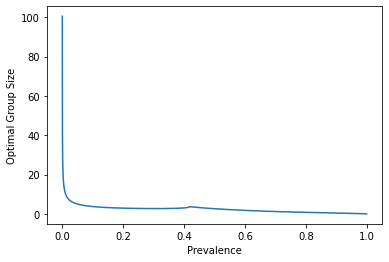

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
p = np.arange(0.0, 0.999999, 0.0001)
plt.figure()
plt.xlabel('Prevalence')
plt.ylabel('Optimal Group Size')
plt.plot(p, optimal_groupSize(p))
plt.show()

##### **3.2 Testing Efficiencies with Perfect Levels** <br>
First, testing efficiencies can be calculated for perfectly accurate testings ($S_e = S_p = 1$) with by above equations and represented by solid lines in the following graph. However, in real-world situations, the sensitivity and specificity are rarely perfect. With different levels of accuracy, the efficiency of the tests will be reduced correspondingly. <br>
However, in "efficiency" here only refers to number of tests reduced to finish testing, but does not guarantee desired accuracy in imperfect testing. In fact, we could prove that lower sensitivity results in greater reduction in number of tests needed and lower specificity works the opposite, which will be shown in next subsection.  <br>
For illustrative purpose, the subgroup in Three Stage Testing will remain constant in this analysis, but more research needs to be done for its optimal subgroup size. This is equal to find the "sub-optimal" group size that is less than or equal to the half of the optimal size from above.

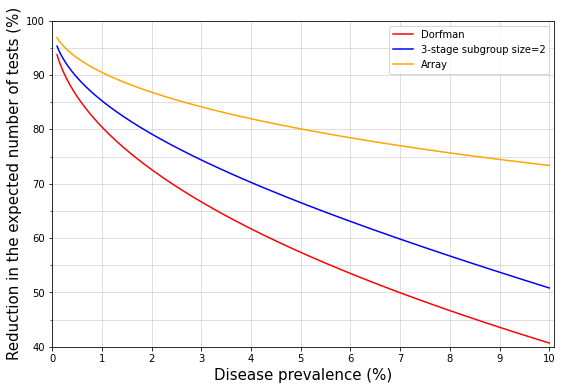

In [ ]:
from scipy.special import lambertw
import warnings
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
warnings.filterwarnings("ignore")
# prevalence
x = np.arange(0.001, 0.1, 0.0000001, dtype=np.float64)
n = 10**9
fig, host = plt.subplots(figsize=(9,6))
plt.xlabel('Disease prevalence (%)', size = 15)
plt.ylabel('Reduction in the expected number of tests (%)',size = 15)
x = np.arange(0.001, 0.1, 0.0000001, dtype=np.float64)
host.plot(x*100, (1 - DorfmanRatio(n, x, 1, 1, optimal_groupSize(x)))*100, color = "red", label = 'Dorfman')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 2))*100, color='blue', label = '3-stage subgroup size=2')
host.plot(x*100,  (1 - ArrayRatio(n, x, 1, 1, optimal_groupSize(x)))*100, color='Orange', label = 'Array')
host.xaxis.set_major_locator(MultipleLocator(1))
host.yaxis.set_major_locator(MultipleLocator(10))
host.xaxis.set_minor_locator(AutoMinorLocator(0.5))
host.yaxis.set_minor_locator(AutoMinorLocator(2))
host.grid(which='major', alpha=0.5)
host.grid(which='minor', alpha=0.5)
host.set_ylim(40,100)
host.set_xlim(0,10.1)
host.legend()

Efficiencies of Three-Stage Testing, can be greatly affected by the subgroup size. While it should be studied further, a preliminary comparison is given below. As we can see, at lower prevalences, subgroup of size 2 gives the most reduction in number of tests, which will be used in following sections.

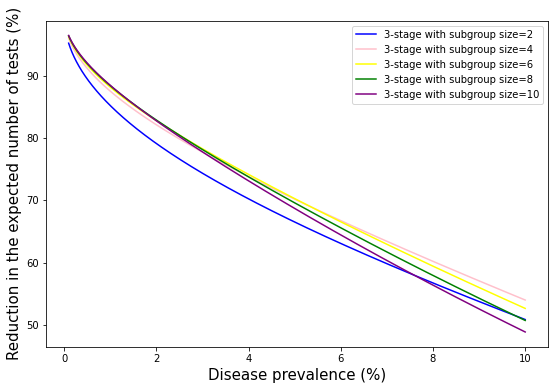

In [ ]:
fig, host = plt.subplots(figsize=(9,6))
plt.xlabel('Disease prevalence (%)', size = 15)
plt.ylabel('Reduction in the expected number of tests (%)',size = 15)
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 2))*100, color='blue', label = '3-stage with subgroup size=2')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 4))*100, color='pink', label = '3-stage with subgroup size=4')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 6))*100, color='yellow', label = '3-stage with subgroup size=6')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 8))*100, color='green', label = '3-stage with subgroup size=8')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 10))*100, color='purple', label = '3-stage with subgroup size=10')
host.legend()

##### **3.3 Changes in Ratio of Reduction with Respect to $S_e$ and $S_p$** <br>
From above graph, we can see that changes in $S_e$ and $S_p$ can have a great influence on the number of reduction of the tests by Dorfman's testing and the efficiency of the pool testing procedure. The follwing graphs show how $S_e$ and $S_p$ affects the ratio with $p = 0.02, 0.06,$ and $0.1$ respectively. 

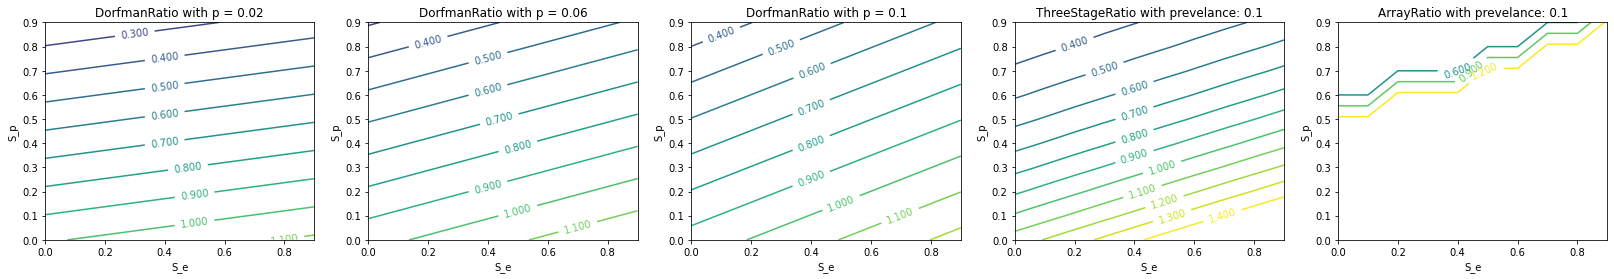

In [ ]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

def z_func(p, se, sp):
 return DorfmanRatio(10^9, p, se, sp, optimal_groupSize(p))
 #return P_k(p, se, sp, optimal_groupSize(p))/InfectedGroupProb(p, optimal_groupSize(p))
def z_func2(p, se, sp):
  return ThreeStageRatio(10^9, p, se, sp, optimal_groupSize(p), 2)
def z_func3(p, se, sp):
  return ArrayRatio(10^9, p, se, sp, optimal_groupSize(p))
x = np.arange(0, 1, 0.1)
y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(x, y)
fig, axs = plt.subplots(1, 5, figsize=(28, 4))
for i in range(1,4):
    Z = z_func(0.02 + (i-1)*0.04, X, Y) 
    ct = axs[i-1].contour(X,Y,Z, levels = np.arange(0, 1.5, 0.1));
    axs[i-1].clabel(ct, inline=1, fontsize=10)
    axs[i-1].set_title("DorfmanRatio with p = " + str(0.02 + (i-1)*0.04))
    axs[i-1].set_xlabel('S_e', fontsize=10)
    axs[i-1].set_ylabel('S_p', fontsize=10)

Z = z_func2(0.1, X, Y) 
ct = axs[3].contour(X,Y,Z, levels = np.arange(0, 1.5, 0.1));
axs[3].clabel(ct, inline=1, fontsize=10)
axs[3].set_title("ThreeStageRatio with prevelance: " + str(0.1))
axs[3].set_xlabel('S_e', fontsize=10)
axs[3].set_ylabel('S_p', fontsize=10)

Z = z_func3(0.1, X, Y) 
ct = axs[4].contour(X,Y,Z, levels = np.arange(0, 1.5, 0.3));
axs[4].clabel(ct, inline=1, fontsize=10)
axs[4].set_title("ArrayRatio with prevelance: " + str(0.1))
axs[4].set_xlabel('S_e', fontsize=10)
axs[4].set_ylabel('S_p', fontsize=10)
plt.show()

As we can see from above graphs, as prevelance increases, $S_e$ will have a greater effects on the reduction ratio than $S_p$ for Dorfman's testing. This can be proved by partial derivatives [11]. <br>
In addition, we can see from above graph that Array Testing is generally more robust to changes in $S_e$ and $S_p$ than Dorfman and 3-Stage Testing because of the algorithem ---- $\sqrt{n'}$ in Array Testing makes it much less sensitive to small changes in $S_e$ and $S_p$.

#### **4. Reduction in number of tests** <br>

Since current studies show variations on sensitivity and specificity while some like to overestimate, an approximately average sensitivity of 80% and specificity of 95% will be used for the purpose of this analysis [12]. The following graph shows the the ratio of reduction of tests by testing types, and how it's compared to perfect tests.

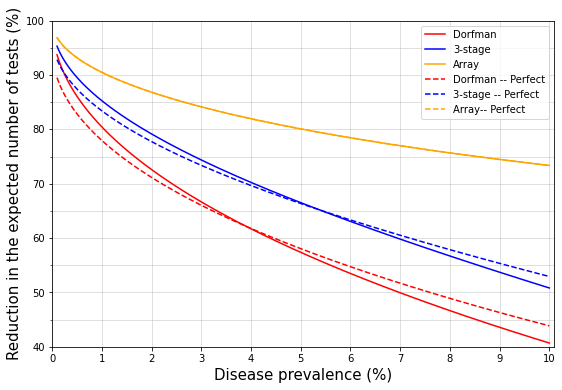

In [ ]:
x = np.arange(0.001, 0.1, 0.0000001, dtype=np.float64)
n = 10**9
fig, host = plt.subplots(figsize=(9,6))
plt.xlabel('Disease prevalence (%)', size = 15)
plt.ylabel('Reduction in the expected number of tests (%)',size = 15)
x = np.arange(0.001, 0.1, 0.0000001, dtype=np.float64)
host.plot(x*100, (1 - DorfmanRatio(n, x, 1, 1, optimal_groupSize(x)))*100, color = "red", label = 'Dorfman')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 2))*100, color='blue', label = '3-stage')
host.plot(x*100,  (1 - ArrayRatio(n, x, 1, 1, optimal_groupSize(x)))*100, color='Orange', label = 'Array')
host.plot(x*100, (1 - DorfmanRatio(n, x, 0.8, 0.95, optimal_groupSize(x)))*100,'--', color = "red", label = 'Dorfman -- Perfect')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 0.8, 0.95, optimal_groupSize(x), 2))*100, '--', color='blue', label = '3-stage -- Perfect')
host.plot(x*100,  (1 - ArrayRatio(n, x, 0.8, 0.95, optimal_groupSize(x)))*100, '--',color='Orange', label = 'Array-- Perfect')
host.xaxis.set_major_locator(MultipleLocator(1))
host.yaxis.set_major_locator(MultipleLocator(10))
host.xaxis.set_minor_locator(AutoMinorLocator(0.5))
host.yaxis.set_minor_locator(AutoMinorLocator(2))
host.grid(which='major', alpha=0.5)
host.grid(which='minor', alpha=0.5)
host.set_ylim(40,100)
host.set_xlim(0,10.1)
host.legend()

#### **5.Effectiveness Analysis Testing strategies of RT-PCR Test** <br>


##### **5.1 Individual Testing**<br>
As shown in 3.3, $S_e$ and $S_p$ has great influence on the number of reduction, and the efficacy of testings. <br> The effectiveness of pool-testing using different strategies will be illustrated by comparing the number of true positives, true negative, false positives and false negatives. Below is the ratio given by original individual tests. <br>

In [ ]:
se = 0.8
sp = 0.95
p = 0.01
n = 10**9

def true_positive(n, p, se):
    return n*p*se
def false_negative(n, p, se):
    return n*p*(1 - se)
def true_negative(n, p, sp):
    return n*(1 - p)*sp
def false_positive(n, p, se):
    return n*(1 - p)*(1 - sp)

print("Optimal group size for p = 0.01 is " + str(optimal_groupSize(p)))
print("Proportion of each group from individual test:")
print("True Positive: " + str(true_positive(n, p, se)*100/n) + "%")
print("False Negative: " + str(false_negative(n, p, se)*100/n) + "%")
print("True Negative: " + str(true_negative(n, p, sp)*100/n) + "%")
print("False Positive: " + str(false_positive(n, p, se)*100/n) + "%")

Optimal group size for p = 0.01 is 10.516237295014895
Proportion of each group from individual test:
True Positive: 0.8%
False Negative: 0.19999999999999993%
True Negative: 94.05%
False Positive: 4.950000000000005%


##### **5.2 Dorfman testing**<br>
Since Dorfman testing uses a second round of retest, the results will be influenced by it as below.

In [ ]:
k = optimal_groupSize(p)

# probablity of a group of size k tested 
# true positive: tested positive with at least one actual positive sample
# false positive: tested positive but all are actual negative
# true negative: tested negative with all negative samples
# false negative: tested negative with at least one actual positive sample
def group_TP(p, k, se, sp):
    return P_k(p, se, sp, k) - group_FP(p, k, sp)
def group_FP(p, k, sp):
    return (1-sp**k)*(1-p)**k
def group_TN(p, k, sp):
    return (sp**k)*(1-p)**k


# number of people for retest from true positive groups
retestPop1 = (n/k)*group_TP(p, k, se, sp)*k
# number of true positive people among above groups (tested true positive)
positiveGrp1 = n*p*se
# number of people will be tested as true/false positive/negative from retestPop1
tp1 = positiveGrp1*se
fn1 = positiveGrp1*(1-se)
tn1 = (retestPop1-positiveGrp1)*sp
fp1 = (retestPop1-positiveGrp1)*(1-sp)

# number of people for retest from false positive groups
retestPop2 = (n/k)*group_FP(p, k, se)*k
# number of people will be tested as true/false positive/negative from retestPop2
tp2 = fn2 = 0
tn2 = retestPop2*sp
fp2 = retestPop2*(1-sp)

# number of people tested false negative from negative groups
fn3 = n*p-positiveGrp1

# total number of people will be tested as true/false positive/negative after the test
tp = tp1
fp = fp1+fp2
tn = (n-retestPop1-retestPop2)-fn3+tn1+tn2
fn = fn1+fn2+fn3
print("Proportion of each group from Dorfman Testing:")
print("True Positive: " + str(tp*100/n) + "%")
print("False Negative: " + str(fn*100/n) + "%")
print("True Negative: " + str(tn*100/n) + "%")
print("False Positive: " + str(fp*100/n) + "%")


Proportion of each group from Dorfman Testing:
True Positive: 0.64%
False Negative: 0.35999999999999993%
True Negative: 94.57076514883985%
False Positive: 4.4292348511601505%


Compared to individual tests, the tested true positive rate decreases from $0.80\%$ to $0.64\%$ compared to the actual positive rate of 1%, and the tested true negative rate increased from $94.05\%$ to $94.57\%$. 


##### **5.3 Three-Stage Testing**<br>


In [ ]:
k = optimal_groupSize(p)
k2 = 2 # subgroup size
n = 10**6

# number of people for retest 
retestPop = (n/k)*(P_k(p, se, sp, k))*k
# number of true positive people among people needed retest
positiveGrp1 = n*p*se

#prevalence in the retest group
p2 = positiveGrp1/retestPop

# number of people for retest from true positive groups
retest2Pop1 = (retestPop/k2)*group_TP(p2, k2, se, sp)*k2
# number of true positive people among above groups (tested true positive)
positive2Grp1 = retestPop*p2*se
# number of people will be tested as true/false positive/negative from retest2Pop1
tp1 = positive2Grp1 *se
fn1 = positive2Grp1 *(1-se)
tn1 = (retest2Pop1-positive2Grp1)*sp
fp1 = (retest2Pop1-positive2Grp1)*(1-sp)

# number of people for retest from false positive groups
retest2Pop2 = (retestPop/k2)*group_FP(p2, k2, se)*k2
# number of people will be tested as true/false positive/negative from retestPop2
tp2 = fn2 = 0
tn2 = retest2Pop2*sp
fp2 = retest2Pop2*(1-sp)

# number of people tested false negative from negative groups
fn3 = n*p-positiveGrp1

# number of people tested false negative from negative groups from second time
fn4 = positive2Grp1-tp1-tp2

# total number of people will be tested as true/false positive/negative after the test
tp = tp1
fp = fp1+fp2
tn = (n-retestPop-fn3)+(retestPop-retest2Pop1-retest2Pop2-fn4)+tn1+tn2
fn = fn1+fn2+fn3+fn4
print("Proportion of each group from Three-Stage Testing:")
print("True Positive: " + str(tp*100/n) + "%")
print("False Negative: " + str(fn*100/n) + "%")
print("True Negative: " + str(tn*100/n) + "%")
print("False Positive: " + str(fp*100/n) + "%")

Proportion of each group from Three-Stage Testing:
True Positive: 0.512%
False Negative: 0.456%
True Negative: 98.20951071746225%
False Positive: 0.8224892825377317%


Compared to individual tests, the tested true positive rate decreases from $0.80\%$ to $0.512\%$ compared to the actual positive rate of 1%, and the tested true negative rate increased from $94.05\%$ to $98.21\%$. 


##### **5.4 Array Testing**<br>
Since the results of array testing are dependent on the arrangement of entries on a matrix, it is complicated to calculate the probablity directly from samples. Therefore, a simulation of the process will be achieved by code as below.

In [ ]:
import math
import random
n = 10**6
orders = list(range(n))
samples = [None]*n
# initiate a random sample with prevalence p
positive = 0
negative = 0
for x in range(n):
    if random.random() < p:
        samples[x] = [True, None]
        positive += 1
    else:
        samples[x] = [False, None]
        negative += 1

# test for a single sample based on sensitivity and specificity
def test_result(actual,se,sp):
    if actual:
        if random.random() < se: 
            return True
        else:
            return False
    else: 
        if random.random() < sp:
            return False
        else:
            return True

# test for a sample group based on sensitivity and specificity
def group_test_result(sample_list, se, sp):
    positive = 0
    for i in range(len(sample_list)):
        if sample_list[i][0]:
            positive += 1  
    prob = (1-(1-se)**positive) + (1-sp**(len(sample_list)-positive))
    if random.random() < prob: 
            return True
    else:
            return False

# optimal group size for k
optimal_k = round(optimal_groupSize(p))

# population that needs a retest
retest_population = []
for i in range(math.floor(n/optimal_k)):
    if group_test_result(samples[int(i*optimal_k) : int((i+1)*optimal_k)],se,sp):
          retest_population.extend(samples[int(i*optimal_k) : int((i+1)*optimal_k)])

rows = math.floor(math.sqrt(len(retest_population)))
cols = rows + 1

# rearrange samples for retest into matrix (2d list in Python)
matrix = [samples[x:x+cols] for x in range(0,len(samples),cols)][:rows]

# get the ith column in the matrix (ith row can be obtained by matrix[i])
def column(ma, i):
    return [row[i] for row in ma]

tp = 0
fp = 0
for i in range(rows):
    for j in range(cols):
          if group_test_result(matrix[i], se, sp) and group_test_result(column(matrix, j), se, sp):
              if matrix[i][j][0]: 
                    tp += 1
                    matrix[i][j] = [True, True]
              else:
                    fp += 1
                    matrix[i][j] = [False, True]

print("Proportion of each group from individual test:")
print("True Positive: " + str(tp*100/n) + "%")
print("False Negative: " + str((n*p-tp)*100/n) + "%")
print("True Negative: " + str((n*(1-p)-fp)*100/n) + "%")
print("False Positive: " + str(fp*100/n) + "%")

Proportion of each group from individual test:
True Positive: 0.4823%
False Negative: 0.5177%
True Negative: 50.5523%
False Positive: 48.4477%


The above result of half being tested false positive seems unbelievable at first for negative samples. However, as we consider the nature of array testing we use, we can see that although more than $90\%$ of the samples for retest are negative, the probability of group being tested positive raises significantly even for all negative group since the $\sqrt{n'}$ can be large for greater $n'$s. For example, for a group of 200 negative samples, the possibility of being tested positive is $1-0.95^{200}=0.9999649$. Therefore, the key to effective array testing is to control array size, which can be done by using multidimensional structure.

#### **6.Conclusion** <br>
As shown above, pool testing can be used to significantly reduce the number of tests needed while maintaining the effectiveness of tests to a decent level. Among all three measures discussed, Dorfman has a more stable performance while three-stage testing and array testing are highly dependent on the parameters used, which requires further research for the optimal results.

#### **7.Citations** <br>
[1] BBC News. 2020. Covid-19 Pandemic: Tracking The Global Coronavirus Outbreak. [online] Available at: <https://www.bbc.com/news/world-51235105> [Accessed 15 November 2020]. <br>
[2] U.S. Food and Drug Administration. 2020. Coronavirus Disease 2019 Testing Basics. [online] Available at: <https://www.fda.gov/consumers/consumer-updates/coronavirus-disease-2019-testing-basics> [Accessed 15 November 2020].<br>
[3] U.S. Food and Drug Administration. 2020. Coronavirus Disease 2019 Testing Basics. [online] Available at: <https://www.fda.gov/consumers/consumer-updates/coronavirus-disease-2019-testing-basics> [Accessed 15 November 2020].<br>
[4] Weiner, R., 2020. What Is Pool Testing And How Does It Work?. [online] Washington Post. Available at: <https://www.washingtonpost.com/health/what-is-pool-testing-and-how-does-it-work/2020/06/26/33eee7ea-b7e4-11ea-a510-55bf26485c93_story.html> [Accessed 17 November 2020].
<br>[5] Dorfman, R., 1943. The Detection of Defective Members of Large Populations. The Annals of Mathematical Statistics, 14(4), pp.436-440.
<br>[6] Bilder, C., Iwen, P., Abdalhamid, B., Tebbs, J. and McMahan, C., 2020. Tests in short supply? Try group testing. Significance, 17(3), pp.15-16.
<br>[7] Bilder, C., Iwen, P., Abdalhamid, B., Tebbs, J. and McMahan, C., 2020. Tests in short supply? Try group testing. Significance, 17(3), pp.15-16.
<br>[8] Proof of minimal number
<br>[9] Proof there're less perfect squares than other numbers within a bounded interval of natural numbers
<br>[10] Bertolotti, P., Deaner, B., Deshpande, Y., Hughes, D. and Abadie, A., 2020. Pooled Sample Testing for SARS-CoV-2. MIT Economics, [online] Available at: <https://idss.mit.edu/wp-content/uploads/2020/04/04.28.2020pooled_testing.pdf> [Accessed 17 November 2020].<br>
[11] Partial derivative proof<br>
[12] Bilder, C., Iwen, P., Abdalhamid, B., Tebbs, J. and McMahan, C., 2020. Tests in short supply? Try group testing. Significance, 17(3), pp.15-16.<br>
[13] Chefif, A., Grobe, N., Wang, X. and Kotanko, P., 2020. Simulation Of Pool Testing To Identify Patients With Coronavirus Disease 2019 Under Conditions Of Limited Test Availability. [online] Fresenius Medical Care. Available at: <https://fmcna.com/insights/annual-medical-report/annual-medical-report-2020/pool-testing-coronavirus-patients/> [Accessed 17 November 2020].